In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt

Importing the Dataset

In [2]:
path="C:/Users/AnshK/Downloads/data.csv"
data= pd.read_csv(path)

y=data["diagnosis"]
y=np.array(y)

for i in range(569):             #changing y from M and B to 0 and 1
  if y[i]=="M":
    y[i]=0
  else:
    y[i]=1
data=pd.DataFrame(data)
x=data[data.columns[2:]]

Creating a Logistic Regression Class to Implement the Model

In [3]:
class LogReg:
    def __init__(self, alpha=0.01, lambda_=0.1, num_iters=1000, batch_size=None, threshold=0.5):              #parameters for LogReg
        self.alpha = alpha
        self.lambda_ = lambda_
        self.num_iters = num_iters
        self.batch_size = batch_size
        self.threshold = threshold
        
    def sigmoid(self, z):                                                                                     #sigmoid fxn
        return 1 / (1 + np.exp(-z.astype(float)))
        
    def fit(self, X, y, gradient_descent_type='batch'):                                                       #fit fxn with grad desc
        # Add a column of ones to the input matrix
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Initialize model parameters
        self.w = np.zeros(X.shape[1])
        # Define the cost function
        def cost_function(w, X, y, lambda_):
            z = np.dot(X, w)
            h = self.sigmoid(z)
            J = -(1/X.shape[0]) * (np.dot(y, np.log(h)) + np.dot(1-y, np.log(1-h))) + (lambda_/(2*X.shape[0])) * np.sum(w**2)
            return J
        # Define the gradient of the cost function
        def gradient(w, X, y, lambda_):
            z = np.dot(X, w)
            h = self.sigmoid(z)
            grad = (1/X.shape[0]) * np.dot(X.T, h-y) + (lambda_/X.shape[0]) * w
            return grad
        # Train the model using gradient descent
        cost_history = []
        for i in range(self.num_iters):
            if gradient_descent_type == 'batch':                     # Batch gradient descent
                grad = gradient(self.w, X, y, self.lambda_)
                
            elif gradient_descent_type == 'stochastic':              # Stochastic gradient descent with mini-batch size 1
                indices = np.random.choice(X.shape[0], 1, replace=False)
                X_batch = X[indices,:]
                y_batch = y[indices]
                grad = gradient(self.w, X_batch, y_batch, self.lambda_)
                
            elif gradient_descent_type == 'mini-batch':               # Mini-batch gradient descent with batch size self.batch_size
                indices = np.random.choice(X.shape[0], self.batch_size, replace=False)
                X_batch = X[indices,:]
                y_batch = y[indices]
                grad = gradient(self.w, X_batch, y_batch, self.lambda_)
            else:
                raise ValueError('Invalid gradient descent type')
                
            self.w = self.w - self.alpha * grad
            cost = cost_function(self.w, X, y, self.lambda_)
            cost_history.append(cost)
            
        self.cost_history = cost_history
        
    def predict(self, X):                                                      # predict fxn
        # Add bias term to feature matrix
        X = np.insert(X, 0, 1, axis=1)
        probability = self.sigmoid(X.dot(self.w))
        return (probability >= self.threshold)

    def accuracy(self, X, y):                                                  # fxn for accuracy
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def precision_recall(self, X, y):                                          # fxn for precision and recall
        y_pred = self.predict(X)
        truepos, falsepos, trueneg, falseneg=0,0,0,0
        for i in range(np.size(y)):
            if (y[i]==0) & (y_pred[i]==0):
                trueneg=trueneg+1
            elif (y[i]==1) & (y_pred[i]==1):
                truepos=truepos+1
            elif (y[i]==1) & (y_pred[i]==0):
                falseneg=falseneg+1
            else:
                trueneg=trueneg+1
        
        precision= truepos/(truepos+falsepos)
        recall= truepos/(truepos+falseneg)
        
        return precision, recall
            

    def plot_cost_history(self):                                              # fxn to plot cost history
        plt.plot(self.cost_history)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost function over iterations')
        plt.show()


Applying Feature Engineering (Please comment out this code for LR1)

In [4]:
def fe1(x):
  for col in x.columns:
    if x[col].isna().sum() > 0:
        # check if column is categorical
        if x[col].dtype == 'object':
            x[col] = x[col].fillna(x[col].mode()[0])
        # if column is numerical
        else:
            x[col] = x[col].fillna(x[col].mean())

  return x

x=fe1(x)

def fe2(x):
  means = np.mean(x, axis=0)
  stds = np.std(x, axis=0)

  X_norm = (x - means) / stds

  return X_norm

x=fe2(x)

C:\Users\AnshK\AppData\Local\Temp\ipykernel_28440\789286698.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = x[col].fillna(x[col].mean())


Splitting the Dataset into Test and Train Values

In [5]:
x=x.dropna()    #used for LR1 to drop NaN values     

X=np.array(x)
np.random.seed(1)                                  #we can change seed value to randomize indices
indices = np.arange(X.shape[0])                    #creates array assigning number to each row [0,1,2-----]
np.random.shuffle(indices)                         #randomly shuffles the data
test_size = 0.33

#split the data into training and testing sets
split_index = int(X.shape[0] * (1 - test_size))
train_indices, test_indices = indices[:split_index], indices[split_index:]

X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]


print(np.argwhere(np.isnan(X_test)))
print(np.argwhere(np.isnan(X_train)))

[]
[]


Implementing Model to the dataset 

Accuracy: 0.9840425531914894
Precision: 1.0
Recall 1.0


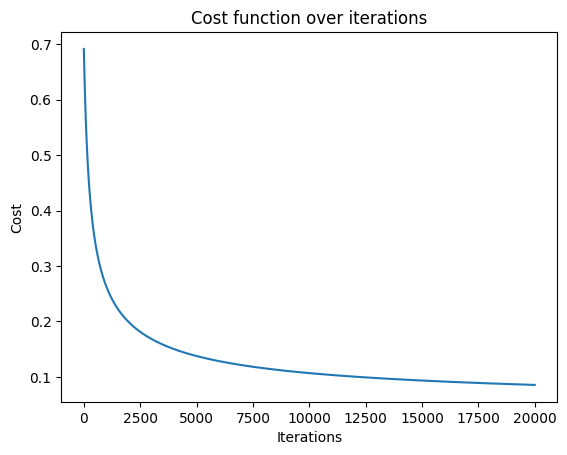

In [15]:
model = LogReg(alpha=0.001, lambda_=0.1, num_iters=17000, threshold=0.5)

# Fit the model to the training data
model.fit(X_train, y_train, gradient_descent_type = 'batch')

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance on test data
accuracy = model.accuracy(X_test, y_test)
print("Accuracy:", accuracy)

precision, recall= model.precision_recall(X_test, y_test)
print("Precision:", precision)
print("Recall", recall)

# Optionally, visualize cost function over iterations
model.plot_cost_history()